In [1]:
import pandas as pd
import numpy as np
from warnings import simplefilter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore') 

# Khám phá dữ liệu

In [2]:
df1 = pd.read_csv('heart_disease_data/long_beach_va.csv', header = None)
df2 = pd.read_csv('heart_disease_data/hungarian.csv', header = None)
df3 = pd.read_csv('heart_disease_data/switzerland.csv', header = None)
df4 = pd.read_csv('heart_disease_data/cleveland.csv', header = None)
frames = [df1, df2, df3, df4]
df = pd.concat(frames)
# df = pd.read_csv('heart_disease_data/cleveland.csv', header = None)
# switzerland hungarian

In [3]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0,2,1,3,1


- Dữ liệu có 920 dòng với 14 thuộc tính
- ? thể hiện giá trị thiếu trong tập dữ liệu
- Ở cột 'sex': 0 : 'female', 1:'male' 

In [4]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [5]:
for name in df.columns:
    df[name].replace('?', np.NaN, inplace=True)

In [6]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,1
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,1
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0


In [7]:
df.shape

(920, 14)

In [8]:
num_row_dup = df.duplicated().sum()
num_row_dup

2

In [9]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
187,58,1,3,150,219,0,1,118,1,0,NaN,NaN,NaN,1
102,49,0,2,110,NaN,0,0,160,0,0,NaN,NaN,NaN,0


- Xóa các dòng bị trùng

In [10]:
new_df = df.drop_duplicates()
new_df.shape

(918, 14)

In [11]:
new_df.duplicated().sum()

0

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       918 non-null    int64 
 1   sex       918 non-null    int64 
 2   cp        918 non-null    int64 
 3   trestbps  859 non-null    object
 4   chol      889 non-null    object
 5   fbs       828 non-null    object
 6   restecg   916 non-null    object
 7   thalach   863 non-null    object
 8   exang     863 non-null    object
 9   oldpeak   856 non-null    object
 10  slope     611 non-null    object
 11  ca        309 non-null    object
 12  thal      434 non-null    object
 13  target    918 non-null    int64 
dtypes: int64(4), object(10)
memory usage: 107.6+ KB


- Các thuộc tính kiểu số đều đang ở dạng object nên ta cần chuyển chúng sang kiểu float. 

In [13]:
converted_trestbps = new_df['trestbps'].astype(float)
converted_chol = new_df['chol'].astype(str).astype(float)
converted_thalach = new_df['thalach'].astype(float)
converted_oldpeak = new_df['oldpeak'].astype(float)
converted_ca = new_df['ca'].astype(float)
converted_thal = new_df['thal'].astype(float)
converted_target = new_df['target'].astype(float)
converted_df = pd.concat([new_df['age'], new_df['sex'], new_df['cp'],converted_trestbps,converted_chol,new_df['fbs'],new_df['restecg'],converted_thalach,new_df['exang'],converted_oldpeak,new_df['slope'],converted_ca,converted_thal, converted_target], axis=1)

In [14]:
converted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    int64  
 2   cp        918 non-null    int64  
 3   trestbps  859 non-null    float64
 4   chol      889 non-null    float64
 5   fbs       828 non-null    object 
 6   restecg   916 non-null    object 
 7   thalach   863 non-null    float64
 8   exang     863 non-null    object 
 9   oldpeak   856 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    918 non-null    float64
dtypes: float64(7), int64(3), object(4)
memory usage: 107.6+ KB


- Để cho thuận tiện cho việc trực quan, nhóm tiến hành chia độ tuổi thành các bin nhỏ hơn: 28, 50, 60 và 70.

In [15]:
cut_labels = ['28', '40', '50', '60', '70']
cut_bins =[28,40,50,60,70,77]
temp_df = converted_df.copy()
temp_df['age_bin']= pd.cut(temp_df['age'], bins=cut_bins, labels=cut_labels )

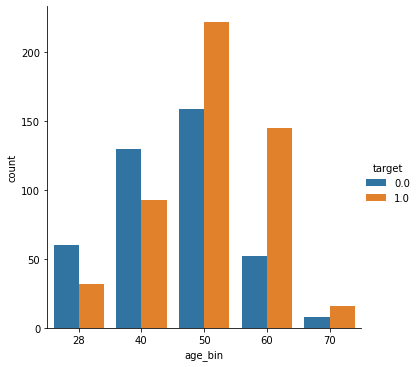

In [16]:
sns.catplot(kind='count', x='age_bin', hue='target', data=temp_df)
plt.show()

- Biểu đồ thể hiện số lượng mắc bệnh tim tập trung ở tuổi 50 trở lên và nhiều nhất nằm trong khoảng 50 đến 60 tuổi

In [17]:
category_df = converted_df[['fbs', 'restecg', 'exang', 'slope']]
category_df['fbs'].dropna(inplace=True)
category_df['restecg'].dropna(inplace=True)
category_df['exang'].dropna(inplace=True)
category_df['slope'].dropna(inplace=True)

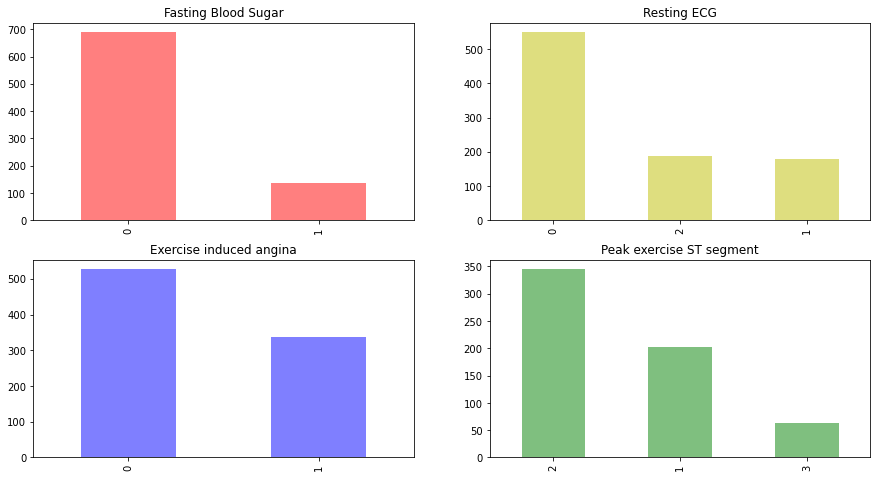

In [18]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
fig.set_figwidth(15)
fig.set_figheight(8)
plt.subplot(2, 2, 1)
category_df['fbs'].astype(str).value_counts().plot(kind='bar', title='Fasting Blood Sugar', alpha=0.5, color='r')
plt.subplot(2, 2, 2)
category_df['restecg'].astype(str).value_counts().plot(kind='bar', title='Resting ECG', alpha=0.5, color='y')
plt.subplot(2, 2, 3)
category_df['exang'].astype(str).value_counts().plot(kind='bar', title='Exercise induced angina', alpha=0.5, color='b')
plt.subplot(2, 2, 4)
category_df['slope'].astype(str).value_counts().plot(kind='bar', title='Peak exercise ST segment', alpha=0.5, color='g')
plt.show()

-	Phần lớn có chỉ số đường huyết lúc đói (Fasting blood sugar) dưới 120mg/dl
-	Hơn một nửa có kết quả điện tâm đồ lúc nghỉ (Resting ECG) bình thường.
-	Tập thể dục không gây ra đau thắt ngực (Exercise induced angina) trên đa số người quan sát
-	Giá trị chiếm đa số của Peak Exercise ST segment.


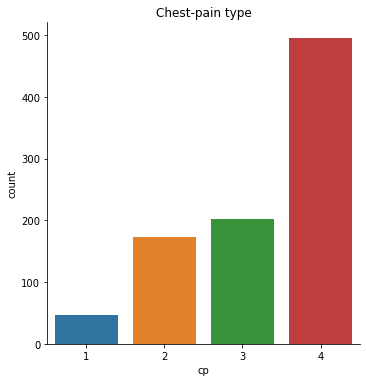

In [19]:
sns.catplot(kind='count', x='cp', data=converted_df)
plt.title('Chest-pain type')
plt.show()

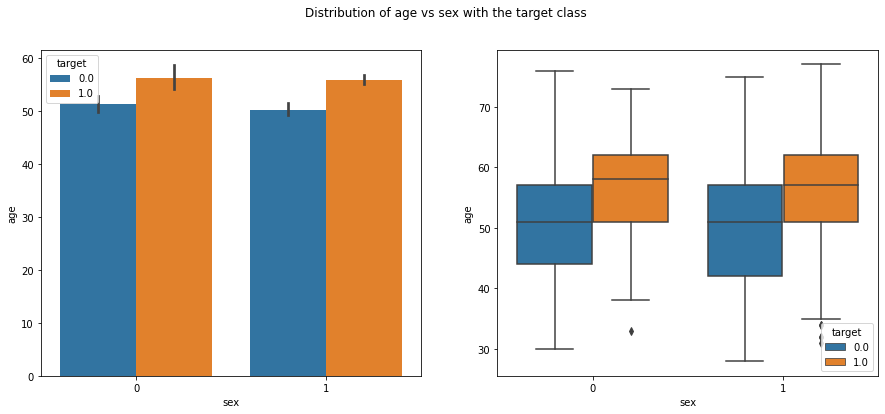

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12,7))
fig.set_figwidth(15)
fig.set_figheight(6)
sns.barplot(data = converted_df, y = 'age', x = 'sex', hue = 'target', ax=ax[0])
sns.boxplot(data = converted_df, y='age', x ='sex', hue='target', ax=ax[1])
fig.suptitle('Distribution of age vs sex with the target class')
plt.show()
# converted_df['sex'] = converted_df.sex.map({'female': 0, 'male': 1})

- Số lượng người mắc bệnh tim ở hai giới là gần ngang nhau, tập trung phần lớn từ khoảng 52 đến 63 tuổi và đều có trung vị gần bằng nhau

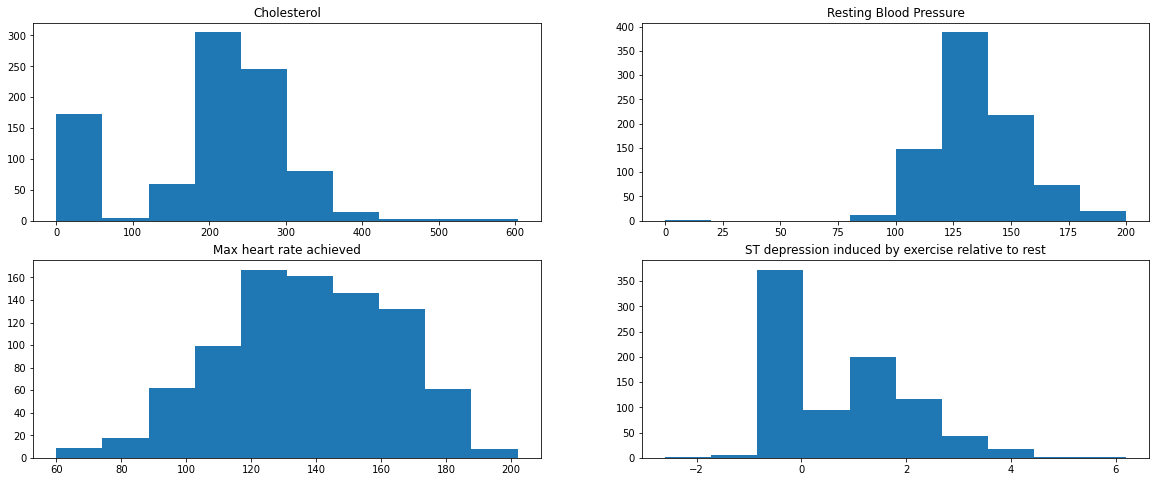

In [21]:
fig, ax = plt.subplots(2,2,figsize=(20,8)) # fbs restecg 
plt.subplot(2, 2, 1)
plt.hist(converted_df["chol"])
plt.title("Cholesterol")
plt.subplot(2,2,2)
plt.hist(converted_df["trestbps"])
plt.title("Resting Blood Pressure")
plt.subplot(2,2,3)
plt.hist(converted_df["thalach"])
plt.title("Max heart rate achieved")
plt.subplot(2,2,4)
plt.hist(converted_df["oldpeak"])
plt.title("ST depression induced by exercise relative to rest")
plt.show()

- Có xuất hiện một số giá trị ngoại lai ở các thuộc tính Cholesterol, Resting Blood Pressure và ST depression induced by exercise relative to rest.

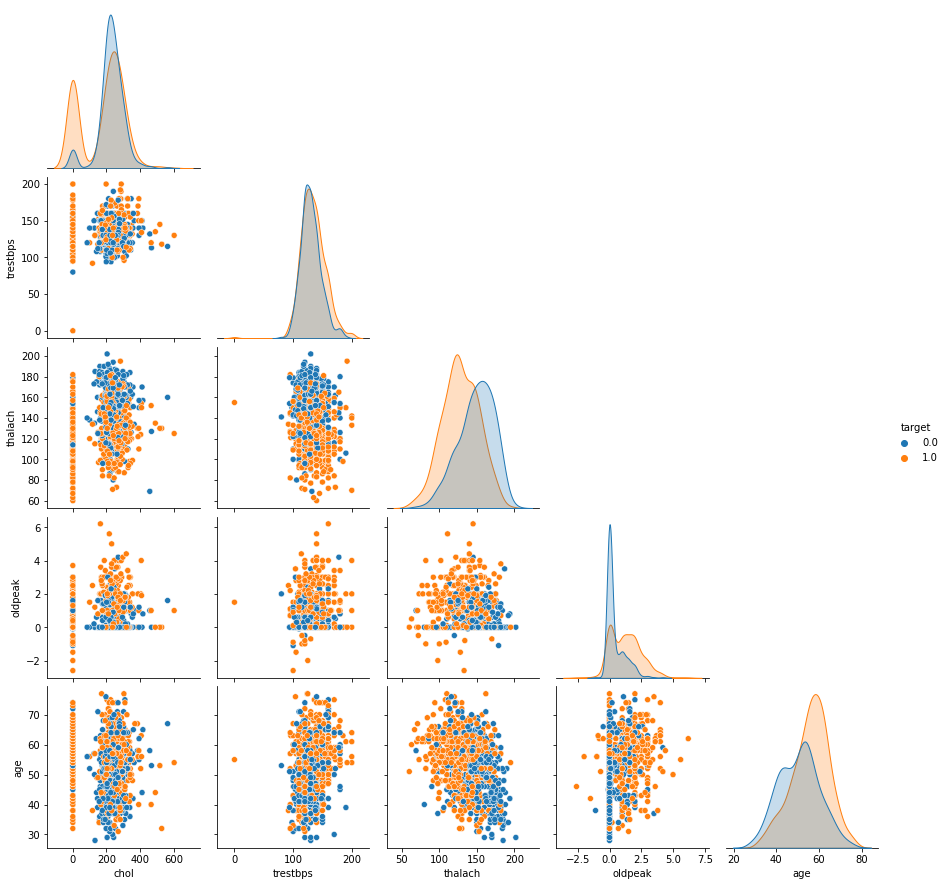

In [22]:
new = converted_df.filter(['chol','trestbps','thalach', 'oldpeak', 'target', 'age'], axis=1)
graph = sns.pairplot(new, hue = 'target', corner=True)
plt.show()

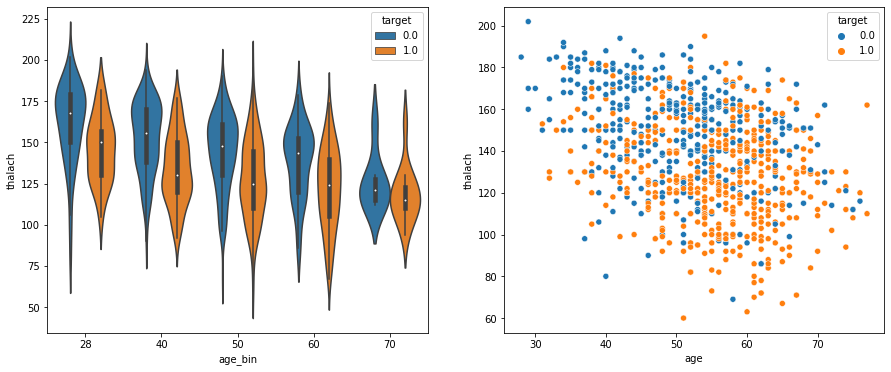

In [23]:
fig, ax = plt.subplots(1,2,figsize = (15,7))
fig.set_figwidth(15)
fig.set_figheight(6)
sns.violinplot(x ='age_bin', y ='thalach', hue='target',data=temp_df,ax=ax[0])
sns.scatterplot(x='age', y='thalach', hue='target',data=converted_df,ax=ax[1])
# sns.boxplot(x=converted_df['trestbps'],ax=ax)
plt.show()

- Nhịp đập tối đa của tim giảm dần theo độ tuổi.
- Những người không mắc bệnh tim trung bình có nhịp tim đập tối đa lớn hơn người mắc bệnh tim trong cùng nhóm tuổi


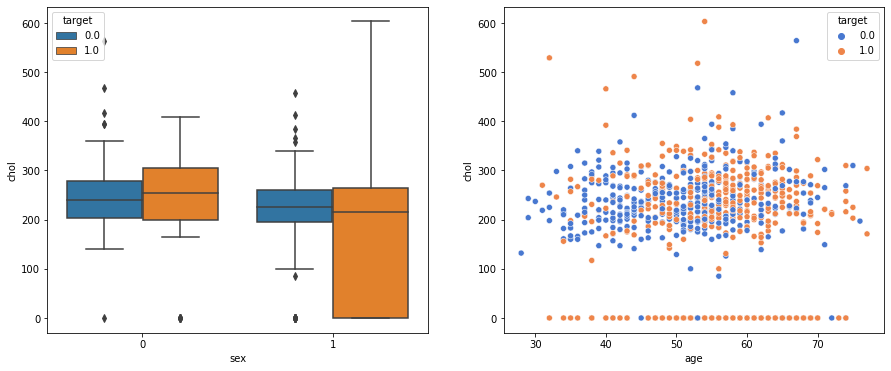

In [24]:
fig, ax = plt.subplots(1,2, figsize=(12,7))
fig.set_figwidth(15)
fig.set_figheight(6)
sns.boxplot(x='sex', y='chol', hue='target', data=temp_df, ax=ax[0])
sns.scatterplot(x='age', y='chol', hue='target', alpha=1, palette='muted' ,data=converted_df, ax=ax[1])
plt.show()

- Những người có mức cholesterol thấp hơn 100 ở mọi nhóm tuổi đa số đều là nam và có mắc bệnh tim

In [25]:
new_df['target'].value_counts(normalize=True)*100

1    55.337691
0    44.662309
Name: target, dtype: float64

## Tiền xử lý (tách các tập)

In [26]:
numeric_cols_df = converted_df.select_dtypes(exclude = 'object')

def missing_ratio(col):
    return col.isna().mean() * 100

def median(col):
    return col.quantile(0.5)

def lower_quartile(col):
    return col.quantile(0.25)

def upper_quartile(col):
    return col.quantile(0.75)

numeric_cols_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])

,age,sex,cp,trestbps,chol,thalach,oldpeak,ca,thal,target
missing_ratio,0.0,0.0,0.0,6.427015,3.159041,5.991285,6.753813,66.339869,52.723312,0.0
min,28.0,0.0,1.0,0.000000,0.000000,60.000000,-2.600000,0.000000,3.000000,0.0
lower_quartile,47.0,1.0,3.0,120.000000,175.000000,120.000000,0.000000,0.000000,3.000000,0.0
median,54.0,1.0,4.0,130.000000,223.000000,140.000000,0.500000,0.000000,6.000000,1.0
upper_quartile,60.0,1.0,4.0,140.000000,268.000000,157.000000,1.500000,1.000000,7.000000,1.0
max,77.0,1.0,4.0,200.000000,603.000000,202.000000,6.200000,3.000000,7.000000,1.0


In [27]:
y_sr = converted_df['target']
X_df = converted_df.drop(columns= ['target'], axis=1)
X_df.shape

(918, 13)

In [28]:
train_X_df, temp_X_df, train_y_sr, temp_y_sr = train_test_split(X_df, y_sr, test_size=0.4, random_state=2000)
val_X_df, test_X_df, val_y_sr, test_y_sr = train_test_split(temp_X_df, temp_y_sr, test_size=0.5, random_state=2000)

## Tập train

In [29]:
train_X_df.shape

(550, 13)

In [30]:
train_y_sr.shape

(550,)

## Tập validate

In [31]:
val_X_df.shape

(184, 13)

In [32]:
val_y_sr.shape

(184,)

## Tập test

In [33]:
test_X_df.shape

(184, 13)

In [34]:
test_y_sr.shape

(184,)

## Tính chất các cột trong tập train

In [35]:
train_X_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
108,61,1,4,120.0,260.0,0,0,140.0,1,3.6,2,1.0,7.0
138,35,1,4,120.0,198.0,0,0,130.0,1,1.6,2,0.0,7.0
88,53,0,4,138.0,234.0,0,2,160.0,0,0.0,1,0.0,3.0
110,65,1,4,NaN,312.0,0,2,NaN,NaN,NaN,NaN,NaN,NaN
38,39,1,4,110.0,273.0,0,0,132.0,0,0.0,NaN,NaN,NaN


In [36]:
train_X_df.dtypes[train_X_df.dtypes != object]

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
thalach     float64
oldpeak     float64
ca          float64
thal        float64
dtype: object

In [37]:
df['age'].sort_values().unique()


array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77],
      dtype=int64)

In [38]:
numeric_cols_df = train_X_df.select_dtypes(exclude = 'object')

def missing_ratio(col):
    return col.isna().mean() * 100

def median(col):
    return col.quantile(0.5)

def lower_quartile(col):
    return col.quantile(0.25)

def upper_quartile(col):
    return col.quantile(0.75)

numeric_cols_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])

,age,sex,cp,trestbps,chol,thalach,oldpeak,ca,thal
missing_ratio,0.0,0.0,0.0,7.818182,2.545455,7.272727,8.0,66.363636,52.363636
min,28.0,0.0,1.0,80.000000,0.000000,60.000000,-2.6,0.000000,3.000000
lower_quartile,47.0,1.0,3.0,120.000000,175.750000,120.000000,0.0,0.000000,3.000000
median,54.0,1.0,4.0,130.000000,223.000000,140.000000,0.5,0.000000,6.000000
upper_quartile,60.0,1.0,4.0,140.000000,266.250000,157.000000,1.5,1.000000,7.000000
max,77.0,1.0,4.0,200.000000,603.000000,202.000000,6.2,3.000000,7.000000


- Ta có thể thấy ca và thal có tỷ lệ giá trị bị thiếu rất cao lần lượt là 66.36% và 52.36%

In [39]:
train_X_df.dtypes[train_X_df.dtypes == object]

fbs        object
restecg    object
exang      object
slope      object
dtype: object

## Bảng mô tả

In [40]:
cate_cols_df = train_X_df.select_dtypes(include = 'object')

def value_counts(col):
    return dict(col.value_counts())

# tỉ lệ giá trị thiếu, số lượng giá trị duy nhất, thống kê giá trị duy nhất
category_stat = cate_cols_df.agg([missing_ratio, pd.Series.nunique, value_counts])
pd.set_option('display.max_colwidth', 10000)
category_stat


,fbs,restecg,exang,slope
missing_ratio,10.1818,0.363636,7.27273,33.2727
nunique,4,6,4,6
value_counts,"{'0': 250, 0: 159, '1': 60, 1: 25}","{'0': 187, 0: 145, 2: 100, 1: 61, '1': 48, '2': 7}","{'0': 194, '1': 132, 0: 124, 1: 60}","{'2': 125, 2: 90, 1: 80, '1': 36, '3': 22, 3: 14}"


## Tiền xử lý (tập huấn luyện)

- Điền giá trị thiếu bằng phương pháp median cho dữ liệu numeric và phương pháp most frequency cho dữ liệu kiểu category

In [41]:
num_cols = ['age','trestbps','chol','thalach','oldpeak']
cate_cols = ['fbs', 'restecg','exang', 'slope','sex','cp', 'ca', 'thal']

num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
mode_imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
colNormalize = StandardScaler()

colTransform = ColumnTransformer(transformers = [('num', num_imputer, num_cols), ('cat', mode_imputer, cate_cols)])
pip = make_pipeline(colTransform, colNormalize)

In [42]:
X_train = pip.fit_transform(train_X_df)
X_val = pip.fit_transform(val_X_df)
X_test = pip.fit_transform(test_X_df)

# Xây dựng model

In [43]:
test_record = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'F-score', 'Best params'])

## SVM

In [44]:
svc = SVC()
grid_values = {'C': [0.1, 1, 10],
              'kernel':['linear', 'rbf', 'poly'],
              'gamma':['scale']}
svc = GridSearchCV(svc, param_grid = grid_values, cv = 3, return_train_score=True)
svc.fit(X_train, train_y_sr)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale'],
                         'kernel': ['linear', 'rbf', 'poly']},
             return_train_score=True)

In [45]:
print("Tham số tốt nhất: ", svc.best_params_)

Tham số tốt nhất:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [46]:
y_pred = svc.predict(X_val)
ac_score = round(accuracy_score(val_y_sr, y_pred),4)
rc_score = round(recall_score(val_y_sr, y_pred),4)
f_score = round(f1_score(val_y_sr, y_pred),4)
test_record = test_record.append({'Model':'SVC', 'Accuracy': ac_score,
                                  'Recall': rc_score,
                                  'F-score':f_score, 'Best params': svc.best_params_}, ignore_index=True)

Accuracy =  0.8424
Recall =  0.9200
F1-score = 0.8638



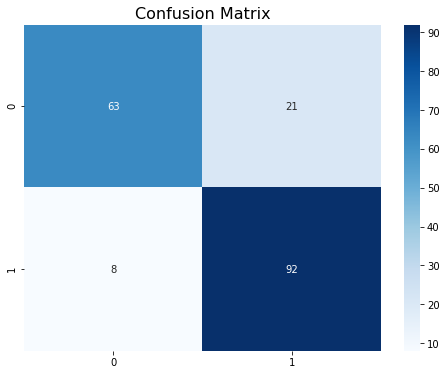

In [47]:
print(f'Accuracy = {ac_score: .4f}\nRecall = {rc_score: .4f}\nF1-score = {f_score:.4f}\n')
cm = confusion_matrix(val_y_sr, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size = 16)
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d')
plt.show()

## Naive Bayes

In [48]:
NB = GaussianNB()
NB.fit(X_train, train_y_sr)

GaussianNB()

In [49]:
y_pred = NB.predict(X_val)
ac_score = round(accuracy_score(val_y_sr, y_pred),4)
rc_score = round(recall_score(val_y_sr, y_pred),4)
f_score = round(f1_score(val_y_sr, y_pred),4)
test_record = test_record.append({'Model':'Naive Bayes', 'Accuracy': ac_score,
                                  'Recall': rc_score,
                                  'F-score':f_score, 'Best params': 'Default'}, ignore_index=True)

Accuracy =  0.8533
Recall =  0.8600
F1-score = 0.8643



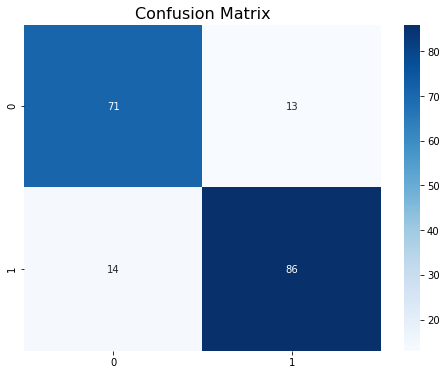

In [50]:
print(f'Accuracy = {ac_score: .4f}\nRecall = {rc_score: .4f}\nF1-score = {f_score:.4f}\n')
cm = confusion_matrix(val_y_sr, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size = 16)
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d')
plt.show()

## Logistic Regression

In [51]:
LR = LogisticRegression()
LR.fit(X_train, train_y_sr)

LogisticRegression()

In [52]:
y_pred = LR.predict(X_val)
ac_score = round(accuracy_score(val_y_sr, y_pred),4)
rc_score = round(recall_score(val_y_sr, y_pred),4)
f_score = round(f1_score(val_y_sr, y_pred),4)
test_record = test_record.append({'Model':'Logistic Regression', 'Accuracy': ac_score,
                                  'Recall': rc_score,
                                  'F-score':f_score, 'Best params': 'Default'}, ignore_index=True)

Accuracy =  0.8424
Recall =  0.8800
F1-score = 0.8585



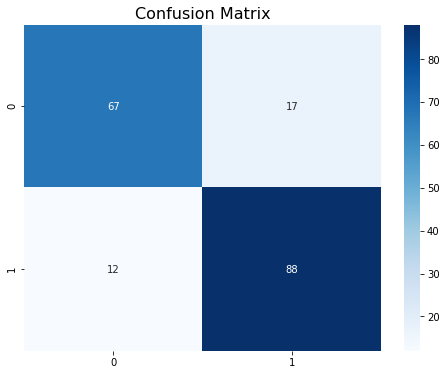

In [53]:
print(f'Accuracy = {ac_score: .4f}\nRecall = {rc_score: .4f}\nF1-score = {f_score:.4f}\n')
cm = confusion_matrix(val_y_sr, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size = 16)
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d')
plt.show()

## Random Forest

In [54]:
RF = RandomForestClassifier()
grid_values = {'n_estimators': [50,100,150,],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10,50,100]}
RF = GridSearchCV(RF, param_grid = grid_values,cv = 3, return_train_score=True)
RF.fit(X_train, train_y_sr)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 50, 100],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [55]:
y_pred = RF.predict(X_val)
ac_score = round(accuracy_score(val_y_sr, y_pred),4)
rc_score = round(recall_score(val_y_sr, y_pred),4)
f_score = round(f1_score(val_y_sr, y_pred),4)
test_record = test_record.append({'Model':'Random Forest', 'Accuracy': ac_score,
                                  'Recall': rc_score,
                                  'F-score':f_score,
                                 'Best params':RF.best_params_}, ignore_index=True)

Accuracy =  0.8370
Recall =  0.9000
F1-score = 0.8571



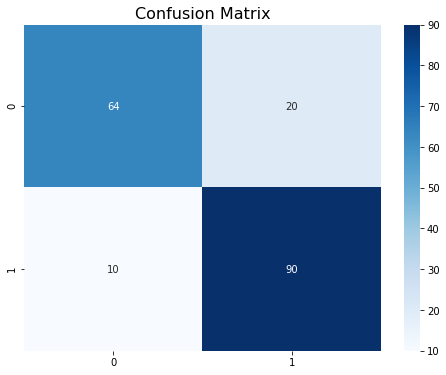

In [56]:
print(f'Accuracy = {ac_score: .4f}\nRecall = {rc_score: .4f}\nF1-score = {f_score:.4f}\n')
cm = confusion_matrix(val_y_sr, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size = 16)
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d')
plt.show()

## Multilayer perceptron Classifier

In [57]:
MLP = MLPClassifier()
grid_values = {'learning_rate':['constant'],
               'hidden_layer_sizes': [(100),(100,100),(100,100,100)],
               'alpha': [1e-3,1e-2, 1e-1]}
MLP = GridSearchCV(MLP, param_grid = grid_values,cv = 3, return_train_score=True)
MLP.fit(X_train,train_y_sr)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'alpha': [0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [100, (100, 100),
                                                (100, 100, 100)],
                         'learning_rate': ['constant']},
             return_train_score=True)

In [58]:
print("Tham số tốt nhất là: ", MLP.best_params_)

Tham số tốt nhất là:  {'alpha': 0.001, 'hidden_layer_sizes': 100, 'learning_rate': 'constant'}


In [59]:
y_pred = MLP.predict(X_val)
ac_score = round(accuracy_score(val_y_sr, y_pred),4)
rc_score = round(recall_score(val_y_sr, y_pred),4)
f_score = round(f1_score(val_y_sr, y_pred),4)
test_record = test_record.append({'Model':'MLPClassifier', 'Accuracy': ac_score,
                                  'Recall': rc_score,
                                  'F-score':f_score, 'Best params': MLP.best_params_}, ignore_index=True)

Accuracy =  0.8370
Recall =  0.8700
F1-score = 0.8529



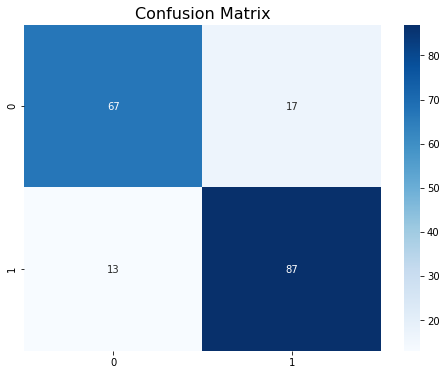

In [60]:
print(f'Accuracy = {ac_score: .4f}\nRecall = {rc_score: .4f}\nF1-score = {f_score:.4f}\n')
cm = confusion_matrix(val_y_sr, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size = 16)
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d')
plt.show()

## Decision Tree

In [61]:
DT = DecisionTreeClassifier()
grid_values = {'max_depth': [50,100,200],
               'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2, 4, 6],
              'random_state':[42,50,100]}
DT = GridSearchCV(DT, param_grid = grid_values,cv = 3, return_train_score=True)
DT.fit(X_train, train_y_sr)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [50, 100, 200],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'random_state': [42, 50, 100]},
             return_train_score=True)

In [62]:
y_pred = DT.predict(X_val)
ac_score = round(accuracy_score(val_y_sr, y_pred),4)
rc_score = round(recall_score(val_y_sr, y_pred),4)
f_score = round(f1_score(val_y_sr, y_pred),4)
test_record = test_record.append({'Model':'Decision Tree', 'Accuracy': ac_score,
                                  'Recall': rc_score,
                                  'F-score':f_score, 'Best params': DT.best_params_}, ignore_index=True)

Accuracy =  0.7337
Recall =  0.7400
F1-score = 0.7513



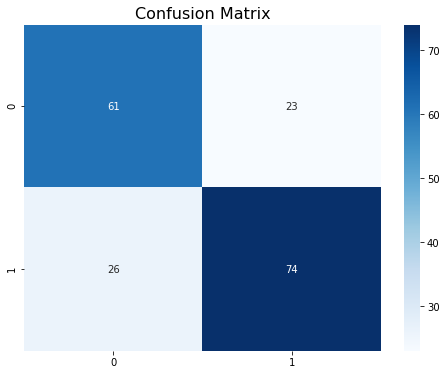

In [63]:
print(f'Accuracy = {ac_score: .4f}\nRecall = {rc_score: .4f}\nF1-score = {f_score:.4f}\n')
cm = confusion_matrix(val_y_sr, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size = 16)
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d')
plt.show()

In [64]:
test_record

,Model,Accuracy,Recall,F-score,Best params
0,SVC,0.8424,0.92,0.8638,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}"
1,Naive Bayes,0.8533,0.86,0.8643,Default
2,Logistic Regression,0.8424,0.88,0.8585,Default
3,Random Forest,0.8370,0.90,0.8571,"{'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 150}"
4,MLPClassifier,0.8370,0.87,0.8529,"{'alpha': 0.001, 'hidden_layer_sizes': 100, 'learning_rate': 'constant'}"
5,Decision Tree,0.7337,0.74,0.7513,"{'max_depth': 50, 'max_features': 'auto', 'min_samples_split': 4, 'random_state': 42}"


In [65]:
best_model = test_record[test_record['Accuracy'] == test_record['Accuracy'].max()]
if best_model.shape[0] > 1:
    best_model = best_model[best_model['Recall'] == best_model['Recall'].max()]
best_model_name = best_model['Model'].values[0]
best_accuracy = test_record['Accuracy'].max()
best_params = best_model['Best params'].values[0]

print('Mô hình tốt nhất là: ', best_model_name)
print('Độ chính xác tốt nhất là: ', best_accuracy)
print('Bộ tham số tốt nhất là: ', best_params)

Mô hình tốt nhất là:  Naive Bayes
Độ chính xác tốt nhất là:  0.8533
Bộ tham số tốt nhất là:  Default


# Tạo mô hình tốt nhất dựa trên kết hợp tập train và tập validate để dự đoán tập test

Accuracy =  0.8315
Recall =  0.8302
F1-score = 0.8502



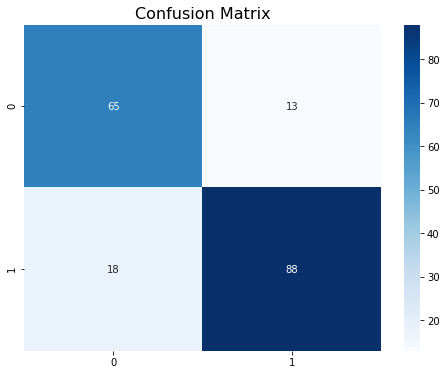

In [66]:
models = {'SVC':svc, 'Naive Bayes': NB, 'Logistic Regression': LR, 'Random Forest': RF, 'MLPClassifier': MLP, 'Decision Tree':DT}
X_df = np.concatenate([X_train, X_val])
y_sr = pd.concat([train_y_sr,val_y_sr])

model = models[best_model_name]
model.fit(X_df, y_sr)
y_pred = model.predict(X_test)
ac_score = round(accuracy_score(test_y_sr, y_pred),4)
rc_score = round(recall_score(test_y_sr, y_pred),4)
f_score = round(f1_score(test_y_sr, y_pred),4)

print(f'Accuracy = {ac_score: .4f}\nRecall = {rc_score: .4f}\nF1-score = {f_score:.4f}\n')
cm = confusion_matrix(test_y_sr, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size = 16)
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d')
plt.show()